# Project 2 - Rosie Faccone

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:  400 rows 

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The standard deviation is going to be larger for the GRE scores vs. the GPA scores because the GRE scores are in general much larger than then GPA values. They are also spread out much wider than the GPA scores. They cover a much larger range and therefore the standard deviation is going to reflect that. 

See the calculations below :

In [5]:
#This is the "range" for the gpa values, pretty narrow- all values close


df_raw.gpa.max() - df_raw.gpa.min()


1.7400000000000002

In [6]:
#This is the range for the GRE scores; note it is much larger (500 times) than the GPA range of values 

df_raw.gre.max() - df_raw.gre.min()


580.0

#### Question 4. Drop data points with missing data


In [7]:
#first test out statements to make sure they are tergeting the rows you want 
#find the rows w missing GRE data

df_raw.ix[(df_raw.gre.isnull())]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [8]:
#find the rows w missing GPA data

df_raw.ix[(df_raw.gpa.isnull())]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
236,1,660.0,NaN,NaN


In [9]:
#find the rows w missing presitge data

df_raw.ix[(df_raw.prestige.isnull())]

,admit,gre,gpa,prestige
236,1,660.0,NaN,NaN


In [10]:
#now drop those rows entirely: copy and paste previous executed statements to avoid error)
df2= df_raw.drop(df_raw.ix[(df_raw.gre.isnull())].index, axis=0)
df2= df2.drop(df2.ix[(df2.gpa.isnull())].index, axis=0)
df2= df2.drop(df2.ix[(df2.prestige.isnull())].index, axis=0)

#store results in new dataframe 

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

We found that 3 unique rows were missing some combination of GPA, GRE or prestige information. 

If our original table contained 400 rows, we should now expect df2 to have 397 rows. 
__Lets check that first__


In [11]:
df2.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

and we get 397 so thats a good start

__We can also re-check for any null values using the same statements as above, just on df2 now. __


In [12]:
#check for any null GPA values 
df2.ix[(df2.gpa.isnull())]

#we get none

,admit,gre,gpa,prestige


In [13]:
#check for any null GRE values 
df2.ix[(df2.gre.isnull())]

#we get none

,admit,gre,gpa,prestige


In [14]:
#check for any null prestige values 
df2.ix[(df2.prestige.isnull())]

#we get none

,admit,gre,gpa,prestige


Answer: __In summation: __

I feel confident that I dropped the desired rows because : 
- I Tested my execution statements before-hand and made sure they were identifying the correct rows
- The "math" for how many rows should have been removed matches up with what was actually removes
- We are left with no remaining null values for any of the three columns 

#### Question 6. Create box plots for GRE and GPA

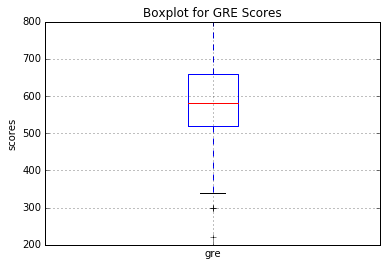

In [15]:
#boxplot for GRE Scores
ax = df2.boxplot(column='gre', return_type='axes' )
_ = ax.set(xlabel="", ylabel="scores", title="Boxplot for GRE Scores")


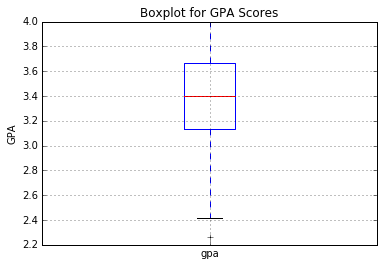

In [16]:
#boxplot for GPA scores
ax = df2.boxplot(column='gpa', return_type='axes' )
_ = ax.set(xlabel="", ylabel="GPA", title="Boxplot for GPA Scores")


#### Question 7. What do this plots show?

Answer:  The two plots have differing scales, but actually very similar shapes. Both of their median values are reasonably centered between Q1 and Q3. The GPA graph appears to be slightly negatively skewed, evident by the larger range represented by Q1.  The GRE graph also looks like it has a larger Q1 which would indicate a negative skew for that distribution as well. 

#### Question 8. Describe each distribution 

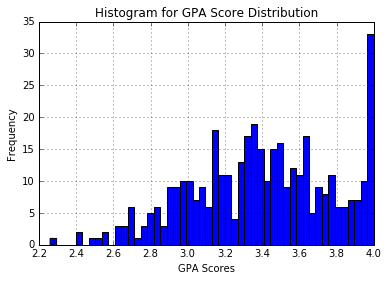

In [17]:
ax = df2.gpa.hist(bins=50)
_= ax= ax.set(xlabel="GPA Scores", ylabel="Frequency", title="Histogram for GPA Score Distribution")

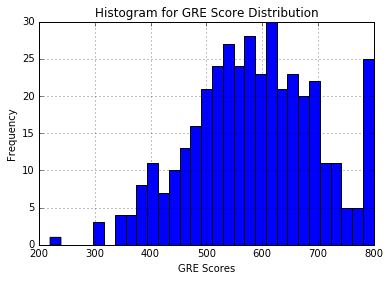

In [96]:
ax = df2.gre.hist(bins=30)
_= ax= ax.set(xlabel="GRE Scores", ylabel="Frequency", title="Histogram for GRE Score Distribution")

The two graphs are still somewhat similar. We see a slight negative skew in general on both distributions. Another prominent feature of the graphs is they both seem to have a high representation of the high extreme values. 

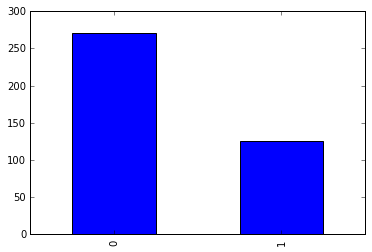

In [90]:
_= df2.admit.value_counts().plot(kind='bar')

It would appear that there are many more rejections (admit=0) than accpetances (admit=1)

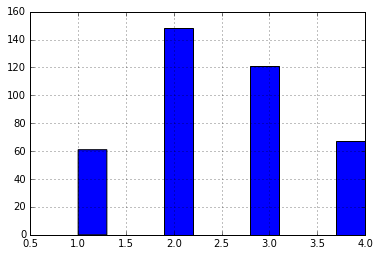

In [94]:
_= df2.prestige.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [19]:
#To help answer that question I will normalize the GRE and GPA Scores
from scipy import stats

In [20]:
#convert distrubitons to z-dist
df2['z_gpa']= stats.zscore(df2['gpa'])
df2['z_gre']= stats.zscore(df2['gre'])

In [21]:
#GRE DISTRIBUTION
std1= sum(abs(df2['z_gre']) < 1 ) / float(len(df2))
std2= sum(abs(df2['z_gre']) < 2 ) / float(len(df2)) 
std3= sum(abs(df2['z_gre']) < 3 ) / float(len(df2)) 

print std1
print std2
print std3

0.702770780856
0.979848866499
0.997481108312


In [22]:
#GPA DISTRIBUTION
std1= sum(abs(df2['z_gpa']) < 1 ) / float(len(df2))
std2= sum(abs(df2['z_gpa']) < 2 ) / float(len(df2)) 
std3= sum(abs(df2['z_gpa']) < 3 ) / float(len(df2)) 

print std1
print std2
print std3

0.637279596977
0.974811083123
1.0


Answer:  A normal distribution follows the general rule that about 68% of data points will be within one standard dev. on either side of the mean. 95% will fall within 2 std. dev., and 99% will fall within 3. As we can see from the above output our data for GRE and GPA values are very close to fitting this kind of distribution. 


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: If we were to transform or interpret our data using an algorithm or technique that highly favors a normally distributed set of data we would probably need to "correct" or modify our data sets to more closely mimic a normal distribution. However, if we don't plan on using a technique or algorithm such as this it would be fine to leave the data as it is. 

Say we were to use an algorithm that favors a normally distributed set, however. In that case we could begin by taking averages of the scores within their individual bins, and this will help us remove some of the noise. You could also omit some of the more high-end extreme data points that are specifically creating the skew. 

Either way, it will be beneficial to standardize the data so they have more uniform values in relation to one another. I have done this by calculating the z scores for GRE and GPA columns

#### Question 11. Which of our variables are potentially colinear? 

In [25]:
# create a correlation matrix for the data
df3=df2
df3 =df3.drop(['gpa', 'gre'],axis=1)
df3.corr()

,admit,prestige,z_gpa,z_gre
admit,1.000000,-0.243563,0.174116,0.181202
prestige,-0.243563,1.000000,-0.060976,-0.124533
z_gpa,0.174116,-0.060976,1.000000,0.382408
z_gre,0.181202,-0.124533,0.382408,1.000000


In [26]:
df3.cov()

,admit,prestige,z_gpa,z_gre
admit,0.217197,-0.107505,0.081248,0.084555
prestige,-0.107505,0.896967,-0.057822,-0.118092
z_gpa,0.081248,-0.057822,1.002525,0.383374
z_gre,0.084555,-0.118092,0.383374,1.002525


#### Question 12. What did you find?

Answer: I found that none of the variables were significantly correlated. The highest correlation coefficient returned was a value of 0.38 between the GPA and GRE scores. That value is not nearly close enough to '1' for us to state a strong/ correlated relationship between the variables

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
- I would begin by looking at the proportion of students admitted vs. rejected grouped by the prestige of the university. I could achieve this by creating a stacked bar chart. This will give me a better idea of how the two variables are affected by one another. 

- I can also use statsmodels to get the results of an OLS regression fit on admit and prestige. Intepreting the results will give me a better idea of how associated the two columns are. (calculated below)

- Next, I will try looking at my tables when grouped by prestige and admit independently.



In [28]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='admit ~ prestige', data=df3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Mon, 21 Mar 2016   Prob (F-statistic):           9.02e-07
Time:                        16:29:50   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6157      0.064      9.630      0.000         0.490     0.741
prestige      -0.1199      0.024     -4.991      0.000        -0.167    -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 14. What is your hypothesis? 

Answer: 
- My null hypothesis would be that there is no association between admission rates and prestige
- My alternative hypothesis is that as the prestige of the school increases, the admission rate will decrease 


## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Instead of dropping missing information we can infer it from the other information available! 
We can accomplish this by: 
- using any statistically significant correlations between columns in our table
- "binning" groups & using median line 

#### 2. Bonus: Log transform the skewed data

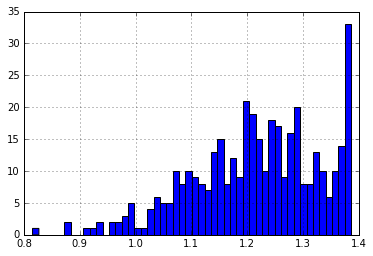

In [72]:
df3['log_gpa']= np.log(df2['gpa'])
_= df3['log_gpa'].hist(bins=50)

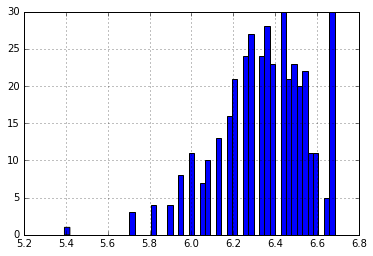

In [73]:
df3['log_gre']= np.log(df2['gre'])
_ = df3['log_gre'].hist(bins=50)

#### 3. Advanced: Impute missing data

OrderedDict([('gre', <matplotlib.axes._subplots.AxesSubplot at 0x11cb64c90>)])

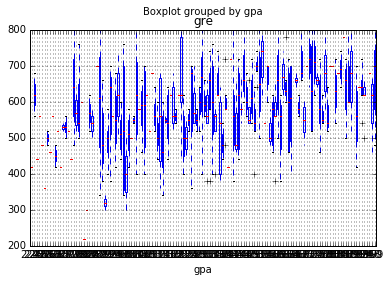

In [47]:
temp=df_raw
temp.boxplot(column='gre', return_type='axes' , by='gpa')
#obviously too many bins(too many gpa values)

In [73]:
#gpa min is 2.26

def group_gpa(x):
    if x < 2.25 :
        return 2.25
    if x < 2.5 and x > 2.25:
        return 2.5
    if x < 2.75 and x > 2.5:
        return 2.75
    if x < 3.0 and x > 2.75:
        return 3.0
    if x < 3.25 and x > 3.0:
        return 3.25
    if x < 3.5 and x > 3.25:
        return 3.5
    if x < 3.75 and x > 3.5:
        return 3.75
    if x < 4.0 and x > 3.75:
        return 4
    
    
#easier to work with less groups 

In [74]:
temp['grouped_gpa']= temp['gpa'].apply(group_gpa)


OrderedDict([('gre', <matplotlib.axes._subplots.AxesSubplot at 0x119435bd0>)])

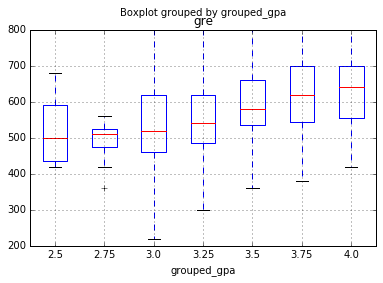

In [98]:
temp.boxplot(column='gre', return_type='axes' , by='grouped_gpa')


In [76]:
 temp.groupby('grouped_gpa').median()

,admit,gre,gpa,prestige
grouped_gpa,,,,
2.50,0,500.0,2.420,3.0
2.75,0,510.0,2.670,2.0
3.00,0,520.0,2.910,3.0
3.25,0,540.0,3.140,2.0
3.50,0,580.0,3.370,2.5
3.75,0,620.0,3.615,2.0
4.00,0,640.0,3.880,3.0


So we can see a pretty clear association between GRE and GPA scores here. we will use this information to infer some of the missing data

Row 212: we have missing GRE score, and a gpa of 2.87
This GPA would fall into the bin where the median GRE score was 520. so we will infer that value

row 236: we have a GRE score of 660, and no value for GPA.I would prefer to do the opposite to infer this value- i.e plot GRE scores grouped by the GPA values. 

--note: this method I am using is fine for only a few missing data points. but I would like to figure out an easier way to do


In [99]:
#set point

temp.loc[212,'gre']= 520
temp.loc[236,'gpa']= 4.0

To impute the missing data for row 187 we will need to take a different approach because we have neither the GRE or GPA information. We do however have the presitge and admit information which we can figure out how to use to infer the missing information

In [ ]:
def group_gre(x):
    